In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime,time
import random

In [2]:
data=pd.read_csv('database.csv')

In [3]:
totalNumberOfUniqueCustomer=len(pd.unique(data['cutomerNumber']))
print('totalNumberOfUniqueCustomer >>>',totalNumberOfUniqueCustomer)


totalNumberOfUniqueTransaction=len(pd.unique(data['transactionID']))

print('totalNumberOfUniqueTransaction >>>',totalNumberOfUniqueTransaction)

totalNumberOfUniqueCustomer >>> 67
totalNumberOfUniqueTransaction >>> 78


In [4]:
# def changeName(x):
#     if type(x) =='str':
#         return x[:-5] + 'xxxxx'
#     else:
#         return str(x)[:-5]+'xxxx'

# data['cutomerNumber']=data['cutomerNumber'].apply(lambda x: changeName(x))

In [5]:
# import datetime
# str(datetime.datetime.fromtimestamp(data['transactionID'][0]))

In [6]:
 data['timeDate']=data['transactionID'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [7]:
 def randomTime(x):
        return (x  - datetime.timedelta(days=random.randint(1,10),minutes=random.randint(1,60), hours=random.randint(1,12)))

In [8]:
from sklearn import model_selection

In [9]:
someDataList=[]
for i in range(5):
    someData1=model_selection.train_test_split(data, test_size=.7)[0]
    someData1['timeDate']=someData1['timeDate'].apply(lambda x: randomTime(x))
    someDataList.append(someData1)

c:\users\sharm\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
xx=pd.concat(someDataList)
newData=pd.concat([xx,data])

In [11]:
data=newData

In [12]:
data=data.reset_index()
del data['index']

In [13]:
data['transaction_date']=data['timeDate'].apply(lambda x: x.date())
data['transaction_month']=data['timeDate'].apply(lambda x: x.month)
data['transaction_year']=data['timeDate'].apply(lambda x: x.year)
data['transaction_day']=data['timeDate'].apply(lambda x: x.day)
data['transaction_hour']=data['timeDate'].apply(lambda x: x.hour)
data['transaction_minute']=data['timeDate'].apply(lambda x: x.minute)
data['transaction_week']=data['timeDate'].apply(lambda x: x.isocalendar()[1])
data['transaction_weekNum']=data['timeDate'].apply(lambda x: x.isocalendar()[2])

In [14]:
data['transactionID']=data['timeDate'].apply(lambda x: int(time.mktime(x.timetuple())))

In [15]:
data.head()

,name,quantity,price,total,cutomerNumber,transactionID,timeDate,transaction_date,transaction_month,transaction_year,transaction_day,transaction_hour,transaction_minute,transaction_week,transaction_weekNum
0,Charkoli,1.00,250,250.0,98265xxxx,1604963246,2020-11-10 04:37:26,2020-11-10,11,2020,10,4,37,46,2
1,Ghujia,0.50,400,200.0,8871256xxxx,1604494326,2020-11-04 18:22:06,2020-11-04,11,2020,4,18,22,45,3
2,Mathri,0.25,250,62.5,91099xxxx,1604654770,2020-11-06 14:56:10,2020-11-06,11,2020,6,14,56,45,5
3,Anarsa,0.50,300,150.0,9406200xxxx,1604583455,2020-11-05 19:07:35,2020-11-05,11,2020,5,19,7,45,4
4,Ghujia,1.00,400,400.0,97130xxxx,1605136127,2020-11-12 04:38:47,2020-11-12,11,2020,12,4,38,46,4


## Unique transactions and customers

In [16]:
totalNumberOfUniqueCustomer=len(pd.unique(data['cutomerNumber']))
print('totalNumberOfUniqueCustomer >>>',totalNumberOfUniqueCustomer)

totalNumberOfUniqueTransaction=len(pd.unique(data['transactionID']))
print('totalNumberOfUniqueTransaction >>>',totalNumberOfUniqueTransaction)

totalNumberOfUniqueCustomer >>> 67
totalNumberOfUniqueTransaction >>> 582


## last 7 day transactions

In [17]:
last7dayTransaction=data.groupby('transaction_date').agg({'total':'sum'}).reset_index().tail(7)

<AxesSubplot:xlabel='transaction_date', ylabel='total'>

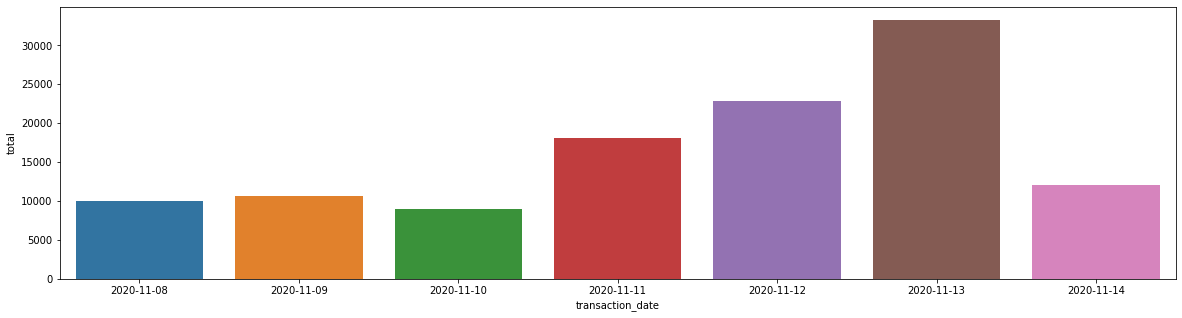

In [18]:
plt.figure(figsize=(20,5))
sns.barplot(x=last7dayTransaction['transaction_date'],y=last7dayTransaction['total'])

### Last 20 transactions

<AxesSubplot:xlabel='transactionID', ylabel='total'>

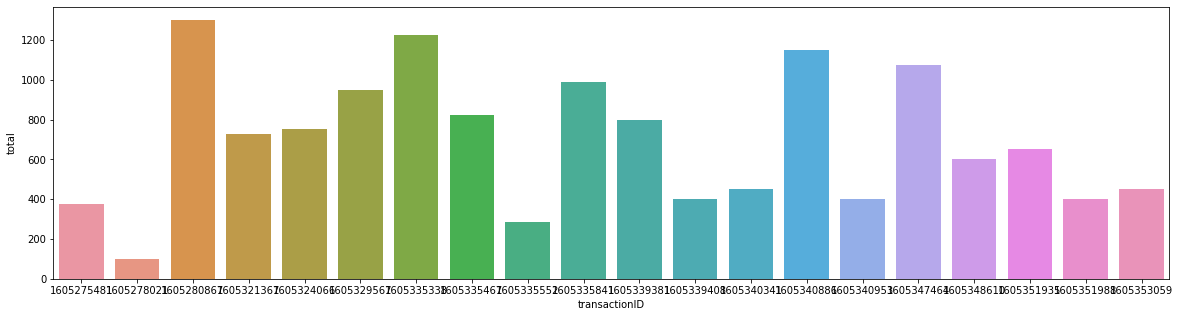

In [19]:
plt.figure(figsize=(20,5))
last10Transaction=data.groupby('transactionID').agg({'total':'sum'}).reset_index().tail(20)
sns.barplot(x=last10Transaction['transactionID'],y=last10Transaction['total'])

## heat map of products with days

In [20]:
pd.pivot_table(data,index=['name'],columns=['transaction_date'],values='total',aggfunc='sum')

transaction_date,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-14
name,,,,,,,,,,,,,,
Anarsa,150.0,NaN,675.0,1125.0,900.0,675.0,225.0,750.0,150.0,900.0,900.0,1875.0,1875.0,900.0
BesanBarfi,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
Bidia,NaN,62.5,NaN,125.0,NaN,NaN,125.0,250.0,187.5,125.0,187.5,62.5,437.5,NaN
Bijori,NaN,NaN,200.0,NaN,400.0,NaN,NaN,NaN,NaN,NaN,400.0,200.0,200.0,NaN
BundiLaddu,NaN,NaN,NaN,50.0,NaN,50.0,NaN,NaN,50.0,NaN,100.0,NaN,50.0,100.0
Charkoli,250.0,500.0,437.5,1062.5,1000.0,625.0,250.0,1000.0,1000.0,187.5,2375.0,2062.5,2375.0,1875.0
ChawalPapad,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,50.0,NaN,NaN,50.0,NaN,NaN
ChawalSevMurku,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
DawaiLaddu,NaN,NaN,175.0,NaN,175.0,NaN,NaN,NaN,NaN,NaN,175.0,875.0,NaN,NaN


## transcations with respect to time for last 7 days

<AxesSubplot:xlabel='None-transaction_hour', ylabel='transaction_date'>

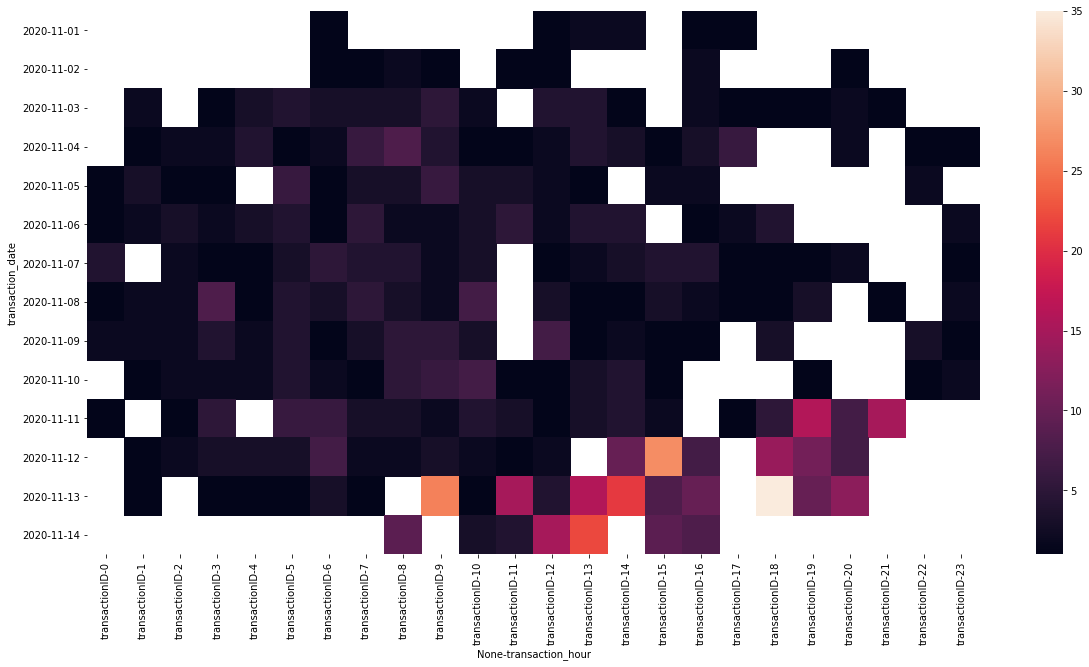

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.pivot_table(data, index=['transaction_date'],columns=['transaction_hour'],values=['transactionID'],aggfunc='count'))

### Last week vs This Week

In [22]:
data.head()

,name,quantity,price,total,cutomerNumber,transactionID,timeDate,transaction_date,transaction_month,transaction_year,transaction_day,transaction_hour,transaction_minute,transaction_week,transaction_weekNum
0,Anarsa,0.50,300,150.0,9406200xxxx,1604595163,2020-11-05 22:22:43,2020-11-05,11,2020,5,22,22,45,4
1,Ghujia,0.25,400,100.0,9301334xxxx,1604548678,2020-11-05 09:27:58,2020-11-05,11,2020,5,9,27,45,4
2,Ghujia,0.50,400,200.0,90985xxxx,1604386847,2020-11-03 12:30:47,2020-11-03,11,2020,3,12,30,45,2
3,Pidia,0.50,400,200.0,94252xxxx,1605062395,2020-11-11 08:09:55,2020-11-11,11,2020,11,8,9,46,3
4,Laddu,1.00,400,400.0,8602447xxxx,1604903701,2020-11-09 12:05:01,2020-11-09,11,2020,9,12,5,46,1


In [23]:
currentWeek=46
lastWeek=currentWeek-1

In [24]:
weekCurrentData=data[data['transaction_week']==currentWeek]
lastweekData=data[data['transaction_week']==lastWeek]


In [25]:
print ('weekCurrentData',weekCurrentData['total'].sum())
print ('lastweekData',lastweekData['total'].sum())

weekCurrentData 105962.5
lastweekData 59300.0


In [26]:
currentWeek,lastWeek

(46, 45)

In [27]:
filTData=data[data['transaction_week'].isin([currentWeek,lastWeek])]

<AxesSubplot:xlabel='transaction_weekNum', ylabel='total'>

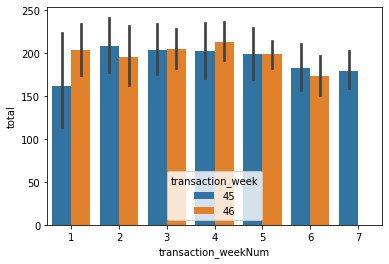

In [28]:
sns.barplot(x=filTData['transaction_weekNum'],y=filTData['total'],hue=filTData['transaction_week'])

### Most sold items

In [29]:
pd.pivot_table(data,index=['name'],columns=['transaction_week'],values=['quantity'],aggfunc='sum')

quantity              
transaction_week       44     45     46
name                                   
Anarsa                0.5  14.50  22.00
BesanBarfi            NaN   0.25   0.25
Bidia                 NaN   2.25   4.00
Bijori                NaN   1.50   2.00
BundiLaddu            NaN   0.50   1.50
Charkoli              1.0  19.50  39.50
ChawalPapad           NaN   0.25   0.50
ChawalSevMurku        NaN   0.50   0.50
DawaiLaddu            NaN   0.50   1.50
Ghujia                0.5  25.75  59.25
KariLaddu             NaN   1.00   5.50
Khaja                 1.0  28.50  38.50
Khurmi                NaN   3.50   6.00
Laddu                 NaN  20.00  37.00
LaiBadi               NaN   1.50   3.50
Mathri                NaN   2.25   8.50
Mixture1              NaN  10.75  11.25
MixtureChiwda         0.5   5.50   9.00
Namkeen               NaN  11.25  18.00
Papchi                NaN   1.25   1.00
Pidia                 0.5  23.75  38.50
RaitaBundi            NaN   2.50   1.50
Sakkarpara            0.5   2.00   4.00
Sev                   0.5   8.00  13.25
Thetri                NaN   1.00   3.00
UradBari              NaN   0.25   0.50

In [18]:
data.to_csv('database2.csv',index=False)